# Informe Final Carrera
Profundiza y ajusta la resolución de tus proyectos: agrega al menos una fuente de datos o prueba un modelo que hasta el momento no hayas aplicado. Elabora un informe ?nal que describa el proceso de toma de decisiones. Sustenta la razón por la cual usaste las librerías y aplicaste los métodos al dataset. Todos tus hallazgos deberán ser comunicados en función de la problemática y las preguntas que buscabas responder.

## Banksim dataset

Detectaremos las transacciones fraudulentas del conjunto de datos de Banksim. Este **conjunto de datos generado sintéticamente** consiste en pagos de varios clientes hechos en diferentes períodos de tiempo y con diferentes cantidades. Para más información sobre el conjunto de datos, puede consultar la página de [Kaggle](https://www.kaggle.com/ntnu-testimon/banksim1) para este conjunto de datos que también tiene el enlace al documento original.  

Los pasos a seguir en el presente estudio, serán los siguientes:

1. Análisis Exploratorio de Datos (EDA)
2. Preprocesamiento de Datos
3. Sobremuestreo (Oversampling) con SMOTE
4. Series de Tiempo
5. Modelos de Machine Learning
6. PCA
7. Comparación del desempeño de los Modelos Desarrollados
8. Conclusión
9. Recursos

### 1. Análisis Exploratorio de Datos

1. __Se importan las librerías__ necesarias para trabajar en la consigna.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

2. __Se realiza la carga el dataset__ usando las funcionalidades de Pandas.

In [2]:
banksim = pd.read_csv('bs140513_032310.csv')

In [3]:
banksim.shape

(594643, 10)

* *El Dataset, cuenta con **594.643 Filas**, y **10 Columnas**.*

In [4]:
banksim.head()

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0


3. Se realiza una __descripción__ de las características:  

* *Step:* Representa el día desde el comienzo de la simulación. Tiene 180 pasos, por lo que la simulación dura virtualmente 6 meses.  
* *Customer:* Representa la identificación del cliente.  
* *zipCodeOrigin:* El código postal de origen/fuente.  
* *Merchant:* La identificación del comerciante.  
* *zipMerchant:* El código postal del comerciante.  
* *Edad:* Edad categorizada, las cuales se detallan a continuación:  
    * 0: <= 18,  
    * 1: 19-25,  
    * 2: 26-35,  
    * 3: 36-45,  
    * 4: 46-55,  
    * 5: 56-65,  
    * 6: > 65  
    * U: Desconocido  
* *Gender:* Género para el cliente.  
    * E : Enterprise,  
    * F: Mujer,  
    * M: Hombre,  
    * U: Desconocido  
* *Category:* Categoría de la compra. A posteriori se verán con más detalle.  
* *Amount:* Cantidad de la compra.  
* *Fraud:* Variable objetivo que muestra si la transacción es fraudulenta(1) o no (0).

4. __Info por Columna:__ Se imprimen los nombres de cada columna, a qué tipo de dato corresponden y sus valores faltantes.

In [5]:
banksim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594643 entries, 0 to 594642
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   step         594643 non-null  int64  
 1   customer     594643 non-null  object 
 2   age          594643 non-null  object 
 3   gender       594643 non-null  object 
 4   zipcodeOri   594643 non-null  object 
 5   merchant     594643 non-null  object 
 6   zipMerchant  594643 non-null  object 
 7   category     594643 non-null  object 
 8   amount       594643 non-null  float64
 9   fraud        594643 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 45.4+ MB


* *Ninguna columna tiene valores faltantes, lo cual es lógico por tratarse de un dataset sintético.*
* *Por ello, es que no será necesario realizar imputación de valores.*

5. Análisis del feature **Fraude**.

* *Los datos de los fraudes estarán desequilibrados como se ve en el gráfico de abajo y en el recuento de instancias.*  
* *Para equilibrar el conjunto de datos se pueden realizar técnicas de sobremuestreo o submuestreo.*  
* *El sobremuestreo es aumentar el número de la clase minoritaria generando instancias de la clase minoritaria.*  
* *El submuestreo consiste en reducir el número de instancias de la clase mayoritaria mediante la selección de puntos aleatorios de la misma hasta que sea igual a la clase minoritaria.*  
* *Ambas operaciones tienen algunos riesgos: El sobremuestreo creará copias o puntos de datos similares que a veces no serían útiles para el caso de la detección de fraudes porque las transacciones fraudulentas pueden variar. El submuestreo significa que perdimos puntos de datos y, por lo tanto, información.*  
* *En el presente análisis, realizaremos una técnica de sobremuestreo llamada SMOTE (técnica de sobremuestreo de minorías sintéticas).*  
* *SMOTE creará nuevos puntos de datos de la clase minoritaria utilizando las instancias vecinas, de modo que las muestras generadas no son copias exactas, sino que son similares a las instancias que tenemos.*

In [6]:
pd.unique(banksim['fraud'])

array([0, 1], dtype=int64)

Text(0.5, 1.0, 'Número de Customers')

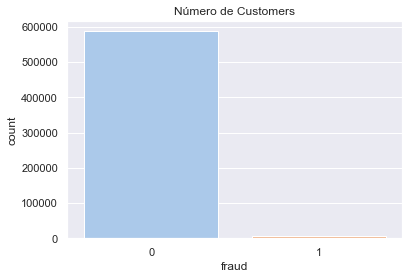

In [7]:
sns.countplot(data = banksim, x = 'fraud', order = banksim['fraud'].value_counts().index, palette='pastel')
plt.title('Número de Customers')

In [8]:
print(banksim['fraud'].value_counts().sum())

594643


In [9]:
print(banksim['fraud'].value_counts())

0    587443
1      7200
Name: fraud, dtype: int64


* *Vemos que las instancias con fraude representan un 98,8% del total, pudiendo corroborarse el desbalanceo del dataset.*

6. Análisis del feature **Fraude por Categoría**.

In [10]:
pd.unique(banksim['category'])

array(["'es_transportation'", "'es_health'", "'es_otherservices'",
       "'es_food'", "'es_hotelservices'", "'es_barsandrestaurants'",
       "'es_tech'", "'es_sportsandtoys'", "'es_wellnessandbeauty'",
       "'es_hyper'", "'es_fashion'", "'es_home'", "'es_contents'",
       "'es_travel'", "'es_leisure'"], dtype=object)

In [11]:
print(banksim['category'].value_counts())

'es_transportation'        505119
'es_food'                   26254
'es_health'                 16133
'es_wellnessandbeauty'      15086
'es_fashion'                 6454
'es_barsandrestaurants'      6373
'es_hyper'                   6098
'es_sportsandtoys'           4002
'es_tech'                    2370
'es_home'                    1986
'es_hotelservices'           1744
'es_otherservices'            912
'es_contents'                 885
'es_travel'                   728
'es_leisure'                  499
Name: category, dtype: int64


* *Además, podemos ver la cantidad media y el porcentaje de fraude por categoría a continuación.*
* *Parece que el **ocio y los viajes son las categorías más seleccionadas por los defraudadores**.*
* *Los defraudadores eligieron las categorías en las que la gente gasta más en promedio. Confirmemos esta hipótesis comprobando la cantidad de fraude y de no fraude que se ha tramitado.*

In [12]:
print("Cantidad media y porcentaje por categoriaa",banksim.groupby('category')['amount','fraud'].mean())

Cantidad media y porcentaje por categoriaa                               amount     fraud
category                                      
'es_barsandrestaurants'    43.461014  0.018829
'es_contents'              44.547571  0.000000
'es_fashion'               65.666642  0.017973
'es_food'                  37.070405  0.000000
'es_health'               135.621367  0.105126
'es_home'                 165.670846  0.152064
'es_hotelservices'        205.614249  0.314220
'es_hyper'                 45.970421  0.045917
'es_leisure'              288.911303  0.949900
'es_otherservices'        135.881524  0.250000
'es_sportsandtoys'        215.715280  0.495252
'es_tech'                 120.947937  0.066667
'es_transportation'        26.958187  0.000000
'es_travel'              2250.409190  0.793956
'es_wellnessandbeauty'     65.511221  0.047594


<ipython-input-12-e747060d8e56>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print("Cantidad media y porcentaje por categoriaa",banksim.groupby('category')['amount','fraud'].mean())


7. Análisis de los features **Fraude por Monto o Gasto**.

In [13]:
banksim[['amount']].describe().round()

,amount
count,594643.0
mean,38.0
std,111.0
min,0.0
25%,14.0
50%,27.0
75%,43.0
max,8330.0


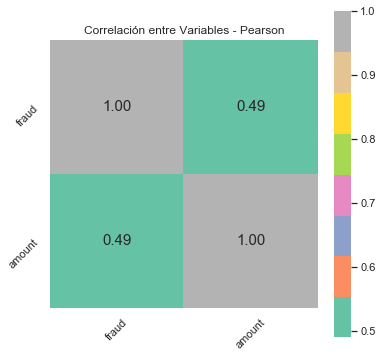

In [14]:
corr = banksim[['fraud','amount']].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15}, cmap= 'Set2')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.title('Correlación entre Variables - Pearson')
plt.show()

* *Como vemos en el cuadro siguiente, podemos decir que en una transacción fraudulenta, será mucho mayor el monto o gasto (`amount`) -unas cuatro veces o más-, que el monto o gasto promedio para dicha categoría.*

In [15]:
# Create two dataframes with fraud and non-fraud data 
df_fraud = banksim.loc[banksim.fraud == 1] 
df_non_fraud = banksim.loc[banksim.fraud == 0]

In [16]:
pd.concat([df_fraud.groupby('category')['amount'].mean(),df_non_fraud.groupby('category')['amount'].mean(),\
           banksim.groupby('category')['fraud'].mean()*100],keys=["Fraudulent","Non-Fraudulent","Percent(%)"],axis=1,\
          sort=False).sort_values(by=['Non-Fraudulent'])

,Fraudulent,Non-Fraudulent,Percent(%)
'es_transportation',NaN,26.958187,0.000000
'es_food',NaN,37.070405,0.000000
'es_hyper',169.255429,40.037145,4.591669
'es_barsandrestaurants',164.092667,41.145997,1.882944
'es_contents',NaN,44.547571,0.000000
'es_wellnessandbeauty',229.422535,57.320219,4.759380
'es_fashion',247.008190,62.347674,1.797335
'es_leisure',300.286878,73.230400,94.989980
'es_otherservices',316.469605,75.685497,25.000000
'es_sportsandtoys',345.366811,88.502738,49.525237


* *Las categorías de gasto promedio son similares; entre 0-500 descartando los valores atípicos, excepto la categoría de viajes, que es muy alta.*

No handles with labels found to put in legend.


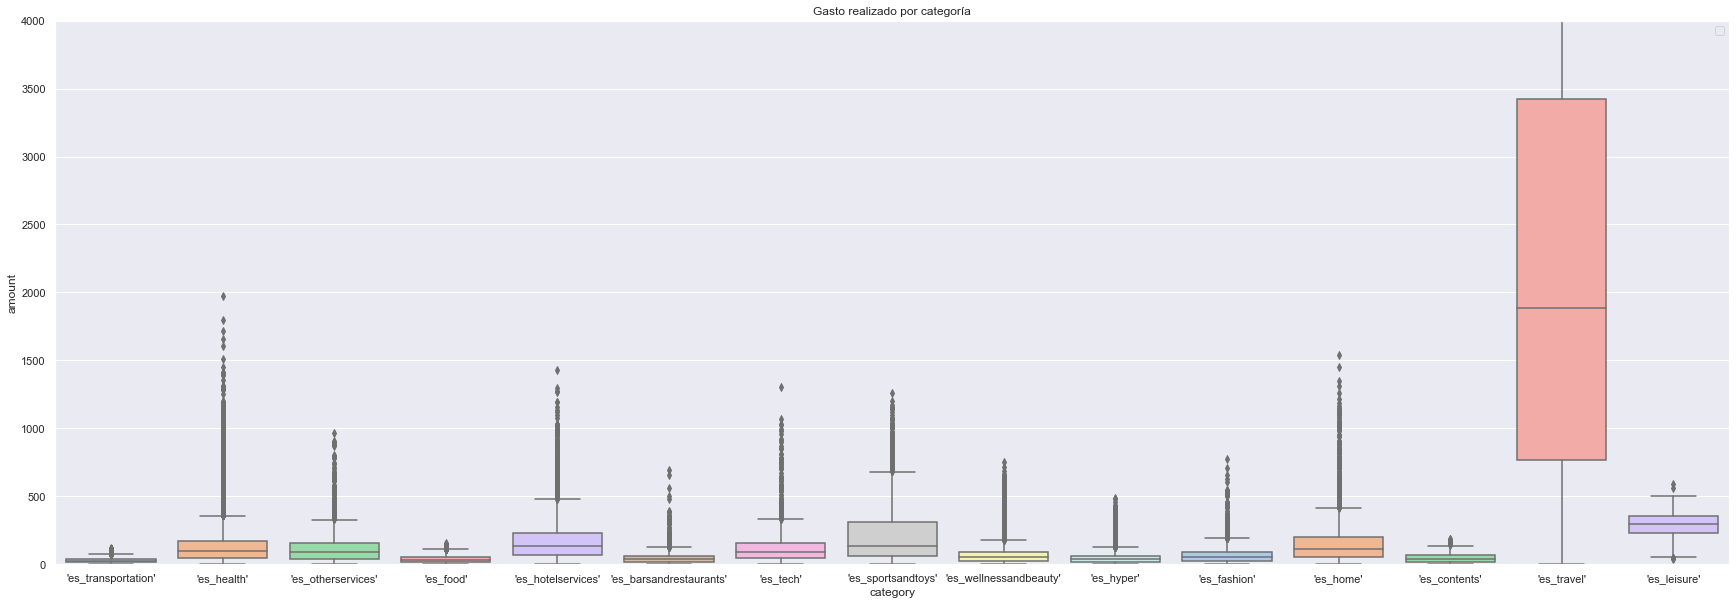

In [17]:
# Plot histograms of the amounts in fraud and non-fraud data 
plt.figure(figsize=(30,10))
sns.boxplot(data = banksim, x = 'category', y = 'amount', palette='pastel')
plt.title("Gasto realizado por categoría")
plt.ylim(0,4000)
plt.legend()
plt.show()

* *Una vez más podemos ver en el histograma de abajo que las transacciones fradulentas son menos en cantidad pero más en monto.*

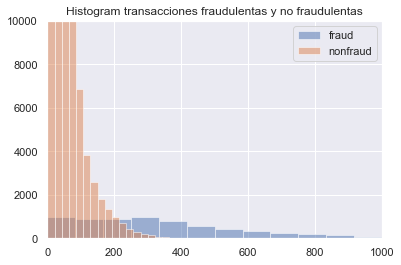

In [18]:
plt.hist(data = df_fraud, x = 'amount', alpha=0.5, label='fraud',bins=100)
plt.hist(data = df_non_fraud, x = 'amount', alpha=0.5, label='nonfraud',bins=100)
plt.title("Histogram transacciones fraudulentas y no fraudulentas")
plt.ylim(0,10000)
plt.xlim(0,1000)
plt.legend()
plt.show()

* *Con montos mayores a 400, ya poderíamos decir que hay fraude.*

8. Análisis de los features **Fraude por Edad**.

In [19]:
pd.unique(banksim['age'])

array(["'4'", "'2'", "'3'", "'5'", "'1'", "'6'", "'U'", "'0'"],
      dtype=object)

In [20]:
print(banksim['age'].value_counts())

'2'    187310
'3'    147131
'4'    109025
'5'     62642
'1'     58131
'6'     26774
'0'      2452
'U'      1178
Name: age, dtype: int64


* *Parece que **el fraude ocurre más en edades iguales y menores de 18 años (0º categoría)**. ¿Puede ser debido a que los estafadores piensan que habría menos consecuencias si muestran su edad más joven, o tal vez realmente son jóvenes.*

In [21]:
print((banksim.groupby('age')['fraud'].mean()*100).reset_index().rename(columns={'age':'Age','fraud' : 'Fraud Percent'}).sort_values(by='Fraud Percent'))

   Age  Fraud Percent
7  'U'       0.594228
6  '6'       0.974826
5  '5'       1.095112
1  '1'       1.185254
3  '3'       1.192815
2  '2'       1.251401
4  '4'       1.293281
0  '0'       1.957586


9. Análisis del feature **Customer**.

In [22]:
pd.unique(banksim['customer'])

array(["'C1093826151'", "'C352968107'", "'C2054744914'", ...,
       "'C1014783484'", "'C849065220'", "'C1809646275'"], dtype=object)

In [23]:
print(banksim['customer'].value_counts())

'C1978250683'    265
'C1275518867'    252
'C806399525'     237
'C515668508'     205
'C1338396147'    195
                ... 
'C1345586046'      6
'C1156745710'      6
'C1809646275'      5
'C1743702978'      5
'C1404665203'      5
Name: customer, Length: 4112, dtype: int64


10. Análisis del feature **Merchant**.

In [24]:
pd.unique(banksim['merchant'])

array(["'M348934600'", "'M1823072687'", "'M50039827'", "'M1888755466'",
       "'M1053599405'", "'M85975013'", "'M480139044'", "'M692898500'",
       "'M348875670'", "'M151143676'", "'M840466850'", "'M1741626453'",
       "'M1535107174'", "'M855959430'", "'M349281107'", "'M209847108'",
       "'M2122776122'", "'M1873032707'", "'M2011752106'", "'M857378720'",
       "'M1198415165'", "'M1748431652'", "'M980657600'", "'M1352454843'",
       "'M117188757'", "'M547558035'", "'M17379832'", "'M1649169323'",
       "'M1946091778'", "'M97925176'", "'M923029380'", "'M1353266412'",
       "'M1842530320'", "'M677738360'", "'M1313686961'", "'M732195782'",
       "'M1600850729'", "'M1872033263'", "'M3697346'", "'M495352832'",
       "'M1400236507'", "'M1294758098'", "'M1913465890'", "'M45060432'",
       "'M78078399'", "'M2080407379'", "'M1788569036'", "'M1416436880'",
       "'M933210764'", "'M1726401631'"], dtype=object)

In [25]:
print(banksim['merchant'].value_counts())

'M1823072687'    299693
'M348934600'     205426
'M85975013'       26254
'M1053599405'      6821
'M151143676'       6373
'M855959430'       6098
'M1946091778'      5343
'M1913465890'      3988
'M209847108'       3814
'M480139044'       3508
'M349281107'       2881
'M1600850729'      2624
'M1535107174'      1868
'M980657600'       1769
'M78078399'        1608
'M1198415165'      1580
'M840466850'       1399
'M1649169323'      1173
'M547558035'        949
'M50039827'         916
'M1888755466'       912
'M692898500'        900
'M1400236507'       776
'M1842530320'       751
'M732195782'        608
'M97925176'         599
'M45060432'         573
'M1741626453'       528
'M1313686961'       527
'M1872033263'       525
'M1352454843'       370
'M677738360'        358
'M2122776122'       341
'M923029380'        323
'M3697346'          308
'M17379832'         282
'M1748431652'       274
'M1873032707'       250
'M2011752106'       244
'M1416436880'       220
'M1294758098'       191
'M1788569036'   

11. Análisis de los features **Zip Code**.

In [26]:
print(banksim['zipcodeOri'].value_counts())

'28007'    594643
Name: zipcodeOri, dtype: int64


In [27]:
print(banksim['zipMerchant'].value_counts())

'28007'    594643
Name: zipMerchant, dtype: int64


* *Como se observa, hay un sólo tipo de Zip Code, tanto de Origen como de Comerciante, por lo que luego, en el preprocesamiento de datos, los descartaremos.*

### 2. Preprocesamiento de Datos

1. Descartamos las columnas de **Zip Code** y **Customer**.

In [28]:
banksim_reduced = banksim.drop(['zipcodeOri','zipMerchant','customer'],axis=1)

In [29]:
banksim_reduced.head()

,step,age,gender,merchant,category,amount,fraud
0,0,'4','M','M348934600','es_transportation',4.55,0
1,0,'2','M','M348934600','es_transportation',39.68,0
2,0,'4','F','M1823072687','es_transportation',26.89,0
3,0,'3','M','M348934600','es_transportation',17.25,0
4,0,'5','M','M348934600','es_transportation',35.72,0


* *Vemos que se eliminaron ambos Zip Codes y Customer.*

* *Eliminamos Customer por ser una variable poco relevante para nuestro análisis por la amplitud de las opciones.*

2. __Encoders:__ Se aplicará Categorical Encoder para transformar los features string a valores categóricos y se pasarà a int las variables age y step.

* *La elección de Encoder elegida, es porque las categorías a trabajar, son nominales, es decir que no tienen un orden.*

In [30]:
for col_name in banksim_reduced.columns:
    if(banksim_reduced[col_name].dtype == 'object'):
        banksim_reduced[col_name]= banksim_reduced[col_name].astype('category')
        banksim_reduced[col_name] = banksim_reduced[col_name].cat.codes

In [31]:
banksim_reduced.head()

,step,age,gender,merchant,category,amount,fraud
0,0,4,2,30,12,4.55,0
1,0,2,2,30,12,39.68,0
2,0,4,1,18,12,26.89,0
3,0,3,2,30,12,17.25,0
4,0,5,2,30,12,35.72,0


In [32]:
banksim_reduced.dtypes

step          int64
age            int8
gender         int8
merchant       int8
category       int8
amount      float64
fraud         int64
dtype: object

In [33]:
banksim_reduced.describe()

,step,age,gender,merchant,category,amount,fraud
count,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000,594643.000000
mean,94.986827,3.014151,1.451089,23.866580,11.066393,37.890135,0.012108
std,51.053632,1.335884,0.503291,8.590215,2.817118,111.402831,0.109369
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,2.000000,1.000000,18.000000,12.000000,13.740000,0.000000
50%,97.000000,3.000000,1.000000,18.000000,12.000000,26.900000,0.000000
75%,139.000000,4.000000,2.000000,30.000000,12.000000,42.540000,0.000000
max,179.000000,7.000000,3.000000,49.000000,14.000000,8329.960000,1.000000


### 3. Sobremuestreo (Oversampling) con SMOTE

* *Usando SMOTE (Técnica de Sobremuestreo de Minorías Sintéticas) [2] para equilibrar el conjunto de datos. Los resultados muestran que ahora tenemos el número exacto de instancias de clase (1 y 0)*

1. Se **seleccionan las variables** predictoras (`X`) y la variable a predecir (`y`).

In [34]:
X = banksim_reduced[['step','age','gender','merchant','category','amount']]
y = banksim_reduced[['fraud']]

print(X.head(),"\n")
print(y.head())

   step  age  gender  merchant  category  amount
0     0    4       2        30        12    4.55
1     0    2       2        30        12   39.68
2     0    4       1        18        12   26.89
3     0    3       2        30        12   17.25
4     0    5       2        30        12   35.72 

   fraud
0      0
1      0
2      0
3      0
4      0


In [35]:
y[y==1].count()

fraud    7200
dtype: int64

* *Vemos el desbalanceo de los datos.*

2. Aplicamos **SMOTE**.

In [36]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res = pd.DataFrame(y_res)
print(y_res.value_counts())

fraud
1        587443
0        587443
dtype: int64


### 4. Series de Tiempo

### 5. Modelos de Machine Learning

1. Se realiza el __Train Test Split__ para dividir el entrenamiento del test.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)

2. Se define una función para trazar la __curva ROC_AUC__. Es una buena forma visual de ver el rendimiento de la clasificación.

In [38]:
# Función para trazar la curva ROC_AUC

def plot_roc_auc(y_test, preds):
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.title('ROC curve')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('Ratio Verdadero Positivo')
    plt.xlabel('Ratio Falso Positivo')
    plt.show()

* *Como ya he dicho antes, los conjuntos de datos sobre el fraude estarán desequilibrados y la mayoría de los casos no serán fraudulentos. Imagina que tenemos el conjunto de datos aquí y siempre estamos prediciendo que no será fraudulento. Nuestra precisión sería de casi el 99% para este conjunto de datos y sobre todo para otros también, ya que el porcentaje de fraude es muy bajo. Nuestra precisión es muy alta pero no estamos detectando ningún fraude, así que es un clasificador inútil. Por lo tanto, la puntuación de la precisión de la base debería ser mejor al menos que la predicción de siempre no fraudulento para realizar una detección.*

#### 5.1 Modelo Benchmark - Árbol de Decisión

Reporte de Clasificación para Árbol de Decisión: 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97    176233
           1       0.95      0.98      0.97    176233

    accuracy                           0.97    352466
   macro avg       0.97      0.97      0.97    352466
weighted avg       0.97      0.97      0.97    352466

Matriz de Confusión para Árbol de Decisión: 
 [[167908   8325]
 [  3489 172744]]


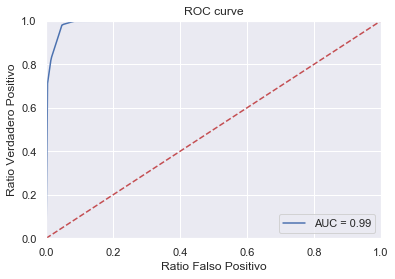

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier(max_depth=4, random_state=10)

tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)


print("Reporte de Clasificación para Árbol de Decisión: \n", classification_report(y_test, y_pred))
print("Matriz de Confusión para Árbol de Decisión: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, tree.predict_proba(X_test)[:,1])

In [40]:
print(tree.feature_importances_)

[0.         0.         0.00701488 0.05213614 0.14516132 0.79568766]


#### 5.2. Random Forest Classifier

* *__Aclaración:__ Los clasificadores basados en Árboles de decisión y los métodos de conjuntos basados en Árboles (RF, XGB) son invariantes al escalado de características (no lo requieren para converger a los errores mínimos), pero aún así, podría ser una buena idea reescalar / estandarizar su datos.  
Es por ello, que en el presente apartado, se optó por llevar a cabo el modelo de XG-Boost, **sin previo escalado de los datos**.*

##### 5.2.1 Se entrena y evalúa el modelo, con sus argumentos por defecto

In [41]:
# Separamos los datos en train y test (held-out)
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42,shuffle=True,stratify=y_res)

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier() # Default n_estimators=100, max_depth=6

In [43]:
rf_clf.fit(X_train, y_train.values.ravel())

<ipython-input-43-152d25007fe9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [44]:
import sklearn.metrics as metrics

y_train_pred = rf_clf.predict(X_train)
y_test_pred = rf_clf.predict(X_test)
print(metrics.accuracy_score(y_train, y_train_pred))
print(metrics.accuracy_score(y_test, y_test_pred))

0.9999987840762627
0.9959286853200024


In [45]:
print(rf_clf.feature_importances_)

[0.01979283 0.01177495 0.02788105 0.22724235 0.32784553 0.38546329]


* *`Surface Total` es el atributo mas importante, el que mejor separa los datos.*

##### 5.2.2 Optimización de Hiperparámetros: RandomSerch

In [ ]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_jobs=-1)
n_estimators = [50,100,150,200]
max_features = ['auto', 'sqrt']
max_depth = [2,4,6,8]

param_grid = dict(max_depth=max_depth,max_features=max_features,n_estimators=n_estimators)
kfold = KFold(n_splits=2, shuffle=True, random_state=0)
ramdom = RandomizedSearchCV(estimator=rf_clf,param_distributions=param_grid,verbose=1,n_iter=30,cv=kfold)
ramdom_result = ramdom.fit(X_train, y_train.values.ravel())

In [ ]:
print('Best Score: ', +str(grid_result.best_score_)+'\n') # Tira los scores de cada modelo
print('Best Params: ', +str(grid_result.best_params_)) # Los mejores parametros del modelo de acuerdo a su score

##### 5.2.3 Se entrena el modelo Random Forest con los argumentos obtenidos de RandomSearch

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100,max_depth=8,random_state=42,
                                verbose=1,class_weight="balanced",oob_score=True,max_features='sqrt')

rf_clf.fit(X_train,y_train)
y_pred = rf_clf.predict(X_test)

print("Reporte de Clasificación para Random Forest Classifier: \n", classification_report(y_test, y_pred))
print("Matriz de Confusión para Random Forest Classifier: \n", confusion_matrix(y_test,y_pred))
plot_roc_auc(y_test, rf_clf.predict_proba(X_test)[:,1])

### 6. PCA

#### 6.1 Aplicación del Modelo de Reducción de Dimensionalidad - PCA

* *Se implementa la técnica de PCA, ya que es particularmente útil en el tratamiento de datos donde existen múltiples - colinealidades entre las características / variables, como ocurre en el presente estudio.*
* *El análisis de componentes principales es una técnica matemática utilizada para la reducción de dimensionalidad. Su objetivo es reducir el número de features, conservando la mayor parte de la información original.*

* *Como **X** vamos a considerar las 5 variables escaladas que sirven como predictoras, con el fin de luego reducir su dimensionalidad y como **y** al Precio.*
* *Como se expuso anteriormente, entre ellas existen múltiples correlaciones, y a su vez, algunas de ellas parece tener influencia en la determinación de los precios (como las superficies), y otras no (ambientes, dormitorios y baños).*

1. Se **seleccionan las variables** predictoras (`X`) y la variable a predecir (`y`).

In [ ]:
X = banksim_reduced[['step','age','gender','merchant','category','amount']]
y = banksim_reduced[['fraud']]

print(X.head(),"\n")
print(y.head())

2. Se **escalan los datos**. Normalizamos las X.

In [ ]:
from sklearn.preprocessing import RobustScaler
X_escalado = RobustScaler().fit_transform(X)

1. Se define la **matriz de Covarianza**.

In [ ]:
# Matriz de covarianza
features = X_escalado.T
cov_matrix = np.cov(features)
cov_matrix[:5]

* En la diagonal de la matriz de covarianzas, tenemos varianzas, y los demás elementos son las covarianzas.

3. Se realiza la **Eigendecomposition**.

In [ ]:
# Eigendecomposition
valores, vectores = np.linalg.eig (cov_matrix) 

* *A partir de ésto, podemos calcular el porcentaje de varianza explicada (explained variance) por componente principal:*

In [ ]:
varianzas_explicadas = [] 
for i in range (len (valores)): 
    varianzas_explicadas.append (valores [i] / np.sum (valores)) 
 
    print (np.sum (varianzas_explicadas), '\n', varianzas_explicadas)

* *El primer valor (penúltima fila) es solo la suma de las varianzas explicadas y debe ser igual a 1. El segundo valor (última fila) es una matriz, que representa el porcentaje de varianza explicada por componente principal.*
* *El primer componente principal representa el 81% de la varianza de los datos, el segundo el 11%.*

* 4. **Visualizaciones**.

In [ ]:
proyectado_1 = X_escalado.dot (vectores.T [0]) 
proyectado_2 = X_escalado.dot (vectores.T [1])
res = pd.DataFrame (proyectado_1, columns = ['PC1']) 
res ['PC2'] = proyectado_2 
res ['Y'] = y

* *Primero se visualiza el conjunto de datos en una dimensión: como una línea (no incluímos a PC2).*

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot (res ['PC1'], [0] * len (res), hue = res ['Y'], s = 200)

* *Luego, se exponen los datos en un espacio 2D:*

In [ ]:
plt.figure (figsize = (10, 5)) 
sns.scatterplot(res['PC1'], res['PC2'], hue=res['Y'], s=100)

* *En ambos gráficos se observa que las variables son difíciles de separar.*

5. Vemos cómo funciona el **modelo PCA**, con 2 componentes principales.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_escalado)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

In [ ]:
print(pca.components_)

* *Los datos transformados se han reducido a una sola dimensión.*
* *La reducción de dimensionalidad de PCA, eliminó la información a lo largo del eje o ejes principales menos importantes, dejando solo el componente o componentes de los datos con la mayor varianza, en éste caso, el primer y segundo componente.*
* *Éste conjunto de datos de dimensión reducida es, en algunos sentidos, "lo suficientemente bueno" para codificar las relaciones más importantes entre los puntos: a pesar de reducir la dimensión de los datos, la relación general entre los puntos de datos se conserva en su mayoría.*

#### 6.2 Entrenamiento del modelo de Árbol de Decisión, previo PCA

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.30, random_state=10)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

lista_rmse_train_dt = []
lista_rmse_test_dt = []

max_depths = [1,2,3,4,5,6,7,8,9,10,20,25,30,40,50,80]

for max_depth in max_depths:

    # Se define el modelo con la profundidad deseada
    tree_regressor = DecisionTreeRegressor(max_depth = max_depth, random_state=10)
    
    tree_regressor.fit(X_train, y_train)
    
    y_train_pred = tree_regressor.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    y_test_pred = tree_regressor.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    lista_rmse_train_dt.append(rmse_train)
    lista_rmse_test_dt.append(rmse_test)

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(max_depths, lista_rmse_train_dt,'o-',label='train' )
plt.plot(max_depths, lista_rmse_test_dt,'o-',label='test')
plt.legend()
plt.xlabel("Max. Profundidad")
plt.ylabel("RMSE")
plt.title('Curva de Validación - Árbol de Decisión')

In [ ]:
regresor = DecisionTreeRegressor(max_depth=10, random_state=42)
regresor.fit(X_train,y_train)

In [ ]:
modelo = ['Árbol de Decisión-PCA']

for i, model in enumerate([regresor]):
    y_train_pred = model.predict(X_train).reshape(416250,1)
    y_test_pred = model.predict(X_test).reshape(178393,1)
    
    print(f'Modelo: {modelo[i]}')
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    
    plt.figure(figsize = (12,5))

    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 25, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 25, label = 'test')
    plt.xlabel('errores')
    plt.title('Histograma de Errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    plt.title('Gráfico de Dispersión')
    
    plt.tight_layout()
    plt.show()

* *Los RMSE tanto para Train como para Test, resultan mucho menores a los obtenidos en el Proyecto 1.*

In [ ]:
regresor.feature_importances_

* *La primer característica tiene una mayor importancia relativa a la hora de realizar predicciones (su importancia es del 88%).*

### 7. Comparación del desempeño de los Modelos Desarrollados

|      Modelo Parte A     | RMSE Train | RMSE Test | Hiperparámetro Utilizado |
|:-----------------------:|:----------:|:---------:|:------------------------:|
| Árbol de Decisión (PCA) |   55181.4  |  56606.9  |      max_depth = 10      |

|   Modelos Parte B   | RMSE Train | RMSE Test |       Hiperparámetros Utilizados      |
|:-------------------:|:----------:|:---------:|:-------------------------------------:|
| Polynomial Features |   57870.9  |  57847.5  | PolyFeatures = 3, alpha (Ridge) = 0.1 |
|       XG-Boost      |   45207.5  |  51105.5  |     n_estimators=100, max_depth=8     |

* *En éste caso, fue **Random Forest fue el modelo con mejor desempeño**.*
* *Éste resultado, era realmente el esperado, ya que se trata de un algoritmo eficiente y fácil de usar que ofrece un alto rendimiento y precisión en comparación con otros algoritmos.*
* *XGBoost, por otro lado, hace divisiones hasta el max_depth especificado y luego comienza a podar el árbol hacia atrás y elimina las divisiones más allá de las cuales no hay ganancia positiva.*
* *Es por ello que se considera uno de los modelos más eficientes a la hora de realizar predicciones.*
* *Sin embargo, si bien XGBoost tiene una regularización incorporada L1 (Regresión de Lasso) y L2 (Regresión de Ridge) que evita que el modelo se sobreajuste, en nuestro caso se ve algo Sobreajustado, ya que el RMSE Train resulta notablemente inferior que el RMSE de Test.*

#### Random Forest

__Random Forest__ es un tipo de Ensamble en Machine Learning en donde combinaremos diversos árboles y la salida de cada uno se contará como “un voto” y la opción más votada será la respuesta del **Bosque Aleatorio**.

Random Forest, al igual que el árbol e decisión, es un *modelo de aprendizaje supervisado para clasificación* (aunque también puede usarse para problemas de regresión).

Random Forest, además de aplicar Bagging, también selecciona features al azar, de esa manera descorrelaciona aún más los distintos modelos de árbol creados.

Random Forest funciona así:
* Seleccionamos k features (columnas) de las m totales (siendo k menor a m) y creamos un árbol de decisión con esas k características.
* Creamos n árboles variando siempre la cantidad de k features y también podríamos variar la cantidad de muestras que pasamos a esos árboles (esto es conocido como “bootstrap sample”)
* Tomamos cada uno de los n árboles y le pedimos que hagan una misma clasificación. Guardamos el resultado de cada árbol obteniendo n salidas.
* Calculamos los votos obtenidos para cada “clase” seleccionada y consideraremos a la más votada como la clasificación final de nuestro “bosque”.

Contamos con una **doble aleatoriedad**: tanto en la selección del valor k de características para cada árbol como en la cantidad de muestras que usaremos para entrenar cada árbol creado.

El ajuste de los hiperparámetros puede ser ventajoso para crear un modelo que sea mejor en la clasificación. En el caso de un bosque aleatorio, puede no ser necesario, ya que los bosques aleatorios ya son muy buenos en la clasificación. Utilizar una búsqueda exhaustiva de cuadrículas para elegir los valores de los hiperparámetros también puede llevar mucho tiempo. Sin embargo, en los casos en que sólo hay unos pocos valores potenciales para sus hiperparámetros o cuando su modelo de clasificación inicial no es muy preciso, podría ser una buena idea investigar al menos el efecto de cambiar algunos de los valores de hiperparámetros en su modelo.

Traducción realizada con la versión gratuita del traductor www.DeepL.com/Translator

* *El modelo de **Árbol de Decisión habiendo aplicado PCA**, posee igualmente, una buena capacidad de predicción, por el hecho de haber realizado reducción de dimensionalidad, pasando de 5 features a 2 estimadores.*
* *No se observa en éste caso sobrejuste, ya que los RMSE obtenidos para Train y Test son similares.*

* *En el caso de **Polynomial Features**, lo que se hizo fue crear muchos atributos nuevos con combinaciones distintas, esperando aproximarse con esas combinaciones, a la función objetivo.*
* *El modelo se desarrolló con PolynomialFeatures de Grado 3, ya que si bien mayores grados podría haber dado lugar a un mejor desempeño, no era muy recomendable teniendo el cuenta el número de features en nuestro dataset, y además porque su desempeño no parecía variar entre dicho Grado y el indicado como Óptimo (Grado = 5).*
* *No se observó sobreajuste en el modelo, ya que se llevó adelante la regularización a través de L2 Ridge, sin embargo no se obtuvieron tan buenos resultados como en el caso de Arboles de Decisión previo PCA*.

### 8. Conclusion

In this kernel we have tried to do fraud detection on a bank payment data and we have achieved remarkable results with our classifiers. Since fraud datasets have an imbalance class problem we performed an oversampling technique called SMOTE and generated new minority class examples. I haven't put the classification results without SMOTE here but i added them in my github repo before so if you are interested to compare both results you can also check my github repo.

Thanks for taking the time to read or just view the results from my first kernel i hope you enjoyed it. I would be grateful for any kind of critique, suggestion or comment and i wish you to have a great day with lots of beautiful data!

### 9. Resources

[1]. Lavion, Didier; et al. "PwC's Global Economic Crime and Fraud Survey 2018" (PDF). PwC.com. Retrieved 28 August 2018.

[2]. SMOTE: Synthetic Minority Over-sampling Technique.